__init__(self, fold=0, tasks=['sede1', 'sede12', 'morfo1', 'morfo2'], corpusFolder="corpusLSTM_ICDO3", foldsFolder="folds10", fileVectors="vectors.txt", phraseLen = 200, lstmCells=150, learningRate=0.001, learningRateDecay=0., dropout=0.5, patience=2, batchSize=65, epochs=100):



In [1]:
import pickle
from tabulate import tabulate
import matplotlib.pyplot as plt
%matplotlib inline

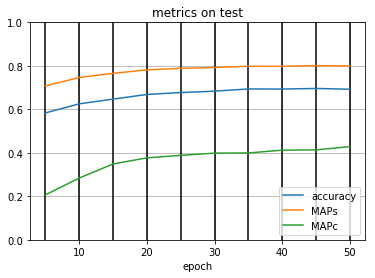

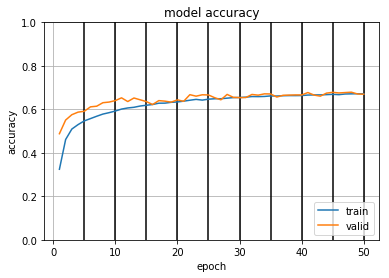

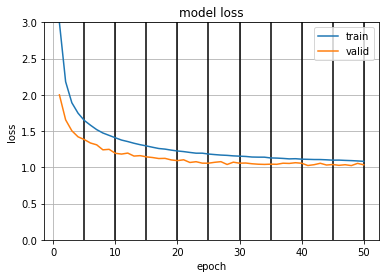

In [2]:
task = "sede12"
fileBase = "./filesFolds-LSTMbidirectional5f"
#numTrainings = 28
numTrainings = 10

modelsEpochs = []

histories = []
for i in range(numTrainings):
    histories.append(pickle.load(open(fileBase+"/history/0/historyCat"+task.capitalize()+"-"+str(i)+".p", 'rb')))

evaluations = []
for i in range(numTrainings):
    evaluations.append(pickle.load(open(fileBase+"/output/0/evaluation"+task.capitalize()+"-"+str(i)+".p", 'rb')))

allAcc = []
allValAcc = []
allLoss = []
allValLoss = []
for history in histories:
    allAcc += history['acc']
    allValAcc += history['val_acc']
    allLoss += history['loss']
    allValLoss += history['val_loss']
    modelsEpochs.append(len(allAcc))

# metrics on test
for x in modelsEpochs:
    plt.axvline(x, color='k')
plt.plot(modelsEpochs, [ev['accuracy'] for ev in evaluations], label='accuracy')
plt.plot(modelsEpochs, [ev['MAPs'] for ev in evaluations], label='MAPs')
plt.plot(modelsEpochs, [ev['MAPc'] for ev in evaluations], label='MAPc')
plt.title('metrics on test')
#plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='lower right')
plt.grid()
plt.ylim([0,1])
plt.show()

# summarize history for accuracy
for x in modelsEpochs:
    plt.axvline(x, color='k')
plt.plot(range(1, len(allAcc)+1), allAcc, label='train')
plt.plot(range(1, len(allValAcc)+1), allValAcc, label='valid')
#plt.plot(modelsEpochs, [ev['accuracy'] for ev in evaluations], label='test')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='lower right')
plt.grid()
plt.ylim([0,1])
plt.show()
# summarize history for loss
for x in modelsEpochs:
    plt.axvline(x, color='k')
plt.plot(range(1, len(allAcc)+1), allLoss, label='train')
plt.plot(range(1, len(allValAcc)+1), allValLoss, label='valid')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.grid()
plt.ylim([0,3])
plt.show()

In [3]:
#fileTable = "./filesFolds-LSTMbidirectional5e/output/0/tableSede12-27.txt"
fileTable = "./filesFolds-LSTMbidirectional5f/output/0/tableSede12-9.txt"
with open(fileTable, 'rt') as fid:
    print(fid.read())
    

------  --------  -----  -----  ------  -----  -----  ------  -------
task    average   MAPs   MAPc   accur.  kappa  prec.  recall  f1score

sede12            0.799  0.428  0.692   0.675
sede12  micro                                  0.692  0.692   0.692
sede12  macro                                  0.298  0.307   0.283
sede12  weighted                               0.662  0.692   0.663
------  --------  -----  -----  ------  -----  -----  ------  -------



In [4]:
fileEvaluation = "./filesFolds-SVMbigrams/output/0/evaluation.p"
tasks = ['sede12']

metrics = pickle.load(open(fileEvaluation, 'rb'))
table = [["task", "average", "MAPs", "MAPc", "accur.", "kappa", "prec.", "recall", "f1score"]]
na = ' '
for task in tasks:
    table.append([" ", " ", " ", " ", " ", " ", " ", " "])
    table.append([task, na, "{:.3f}".format(metrics[task]['MAPs']), "{:.3f}".format(metrics[task]['MAPc']), "{:.3f}".format(metrics[task]['accuracy']), "{:.3f}".format(metrics[task]['kappa']), na, na, na])
    for avg in ['micro', 'macro', 'weighted']:
        table.append([task, avg, na, na, na, na, "{:.3f}".format(metrics[task]['precision'][avg]), "{:.3f}".format(metrics[task]['recall'][avg]), "{:.3f}".format(metrics[task]['f1score'][avg])])
        
print(tabulate(table))

------  --------  -----  -----  ------  -----  -----  ------  -------
task    average   MAPs   MAPc   accur.  kappa  prec.  recall  f1score

sede12            0.788  0.466  0.700   0.684
sede12  micro                                  0.700  0.700   0.700
sede12  macro                                  0.442  0.388   0.395
sede12  weighted                               0.688  0.700   0.685
------  --------  -----  -----  ------  -----  -----  ------  -------
